In [1]:
library(dplyr)      |> suppressPackageStartupMessages()
library(readr)      |> suppressPackageStartupMessages()
library(bnlearn)    |> suppressPackageStartupMessages()
library(bnstruct)   |> suppressPackageStartupMessages()
library(Rgraphviz)  |> suppressPackageStartupMessages()
library(foreach)    |> suppressPackageStartupMessages()
library(doParallel) |> suppressPackageStartupMessages()

In [2]:
learning <- function (data, maxParent, algo = "k2", percentage = 1, plot = F){


    if (percentage < 0 || percentage > 1) {
        stop("Percentage must be between 0 and 1.")
    }

    num_rows <- nrow(data)
    data <- data[1:as.integer(percentage * num_rows), ]

    minValue <- min(data, na.rm = TRUE)
    startsFrom <- ifelse(minValue == 0, 0, 1)

    
    sizes <- sapply(data, function(x) length(unique(x)))
    sizes <- as.numeric(sizes)

    dataset <- BNDataset(data = data,
                      discreteness = rep(TRUE, ncol(data)),
                      variables = colnames(data), 
                      starts.from = startsFrom, 
                      node.sizes = sizes)
                    
    dag <- learn.network(algo = algo, x = dataset, max.parents = maxParent)

    net = empty.graph(names(data))
    amat(net) <- dag(dag)
    for (i in 1:length(names(data))) {
        name = names(data)[i]
        data[, name] = as.factor(as.character(data[, name]))
    }
    score <- score(net, data = data)

    if (plot) {
        plot(dag)
    }
        
    return(list(dag = net, score = score))
}

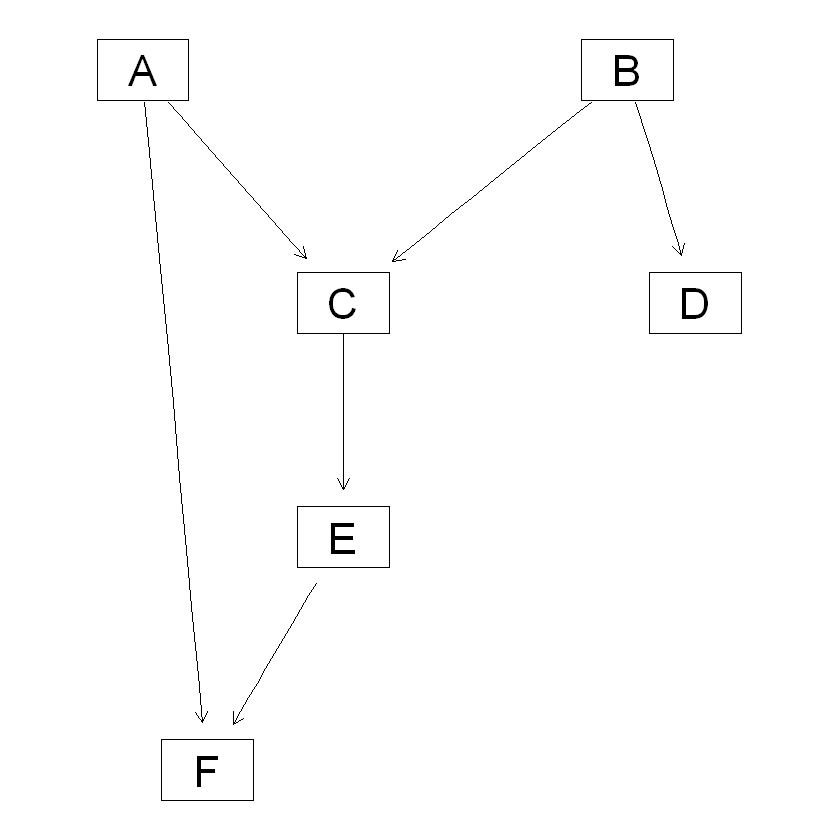

[1] 1

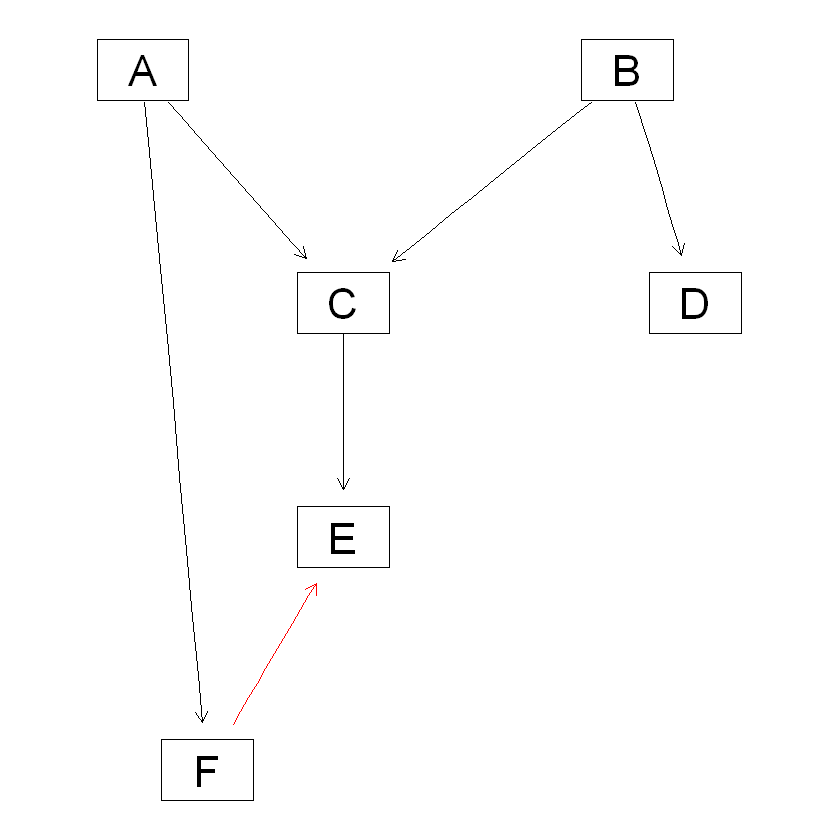

In [3]:
computeShdSingle <- function(theor, empir, plot=FALSE){
  
  DAG1 <- amat(theor)
  DAG2 <- amat(empir)
  shd <- shd(DAG1, DAG2)
  
  if (plot){
    graphviz.compare(theor, empir, shape="rectangle")
  }
  return(shd)
}

e1 <- model2network("[A][B][C|A:B][D|B][E|C][F|A:E]")
e2 <- model2network("[A][B][C|A:B][D|B][E|C:F][F|A]")
computeShdSingle(e1, e2, plot=TRUE)

In [4]:
e1 <- model2network("[A][B][C|A:B][D|B][E|C][F|A:E]")
e2 <- model2network("[A][B][C|A:B][D|B][E|C:F][F|A]")

# Estrai e confronta i nodi e gli archi
nodes_e1 <- nodes(e1)
nodes_e2 <- nodes(e2)
edges_e1 <- arcs(e1)
edges_e2 <- arcs(e2)

print(nodes_e1)
print(nodes_e2)
print(edges_e1)
print(edges_e2)

# Verifica che i nodi siano gli stessi
identical(sort(nodes_e1), sort(nodes_e2)) # Dev'essere TRUE

# Verifica che gli archi siano gli stessi
identical(sort(edges_e1), sort(edges_e2)) # Dev'essere TRUE

[1] "A" "B" "C" "D" "E" "F"
[1] "A" "B" "C" "D" "E" "F"
     from to 
[1,] "A"  "C"
[2,] "B"  "C"
[3,] "B"  "D"
[4,] "C"  "E"
[5,] "A"  "F"
[6,] "E"  "F"
     from to 
[1,] "A"  "C"
[2,] "B"  "C"
[3,] "B"  "D"
[4,] "C"  "E"
[5,] "F"  "E"
[6,] "A"  "F"


[1] TRUE

[1] TRUE

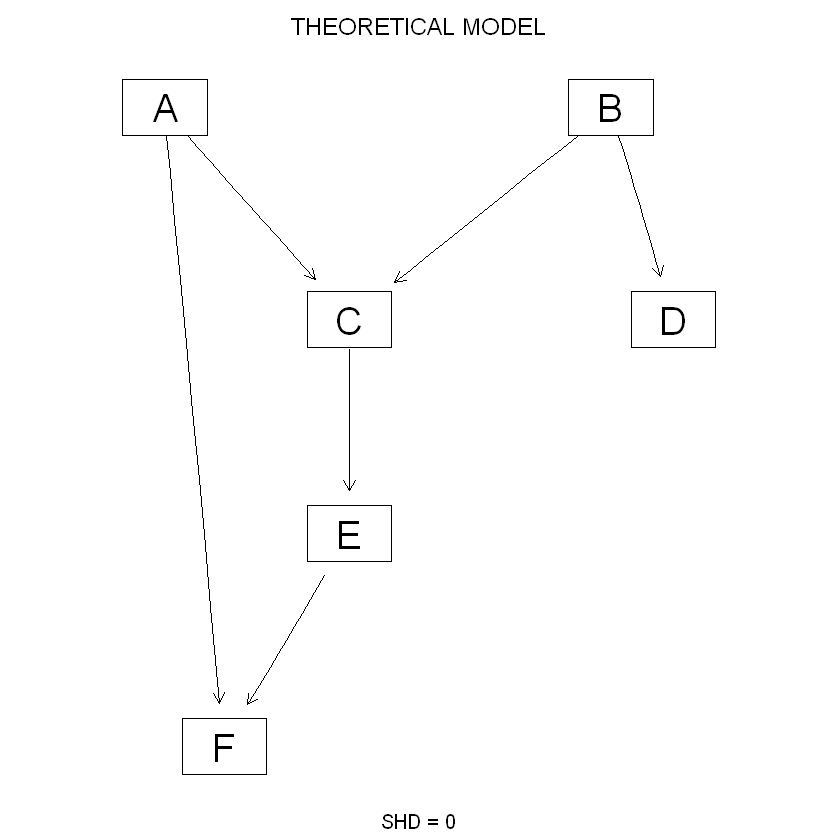

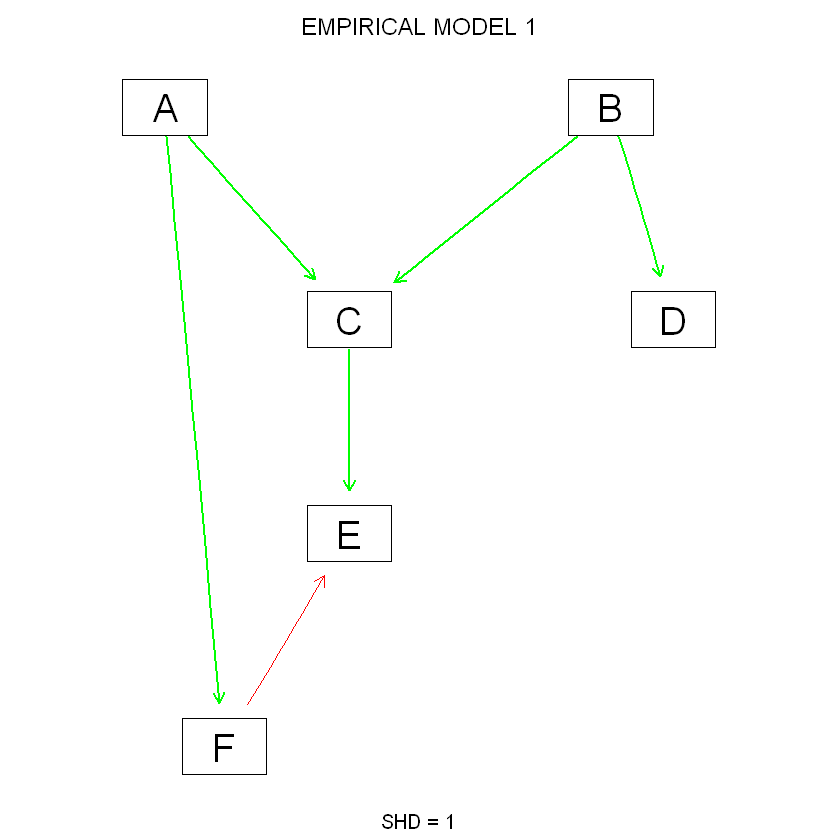

[1] 1 0


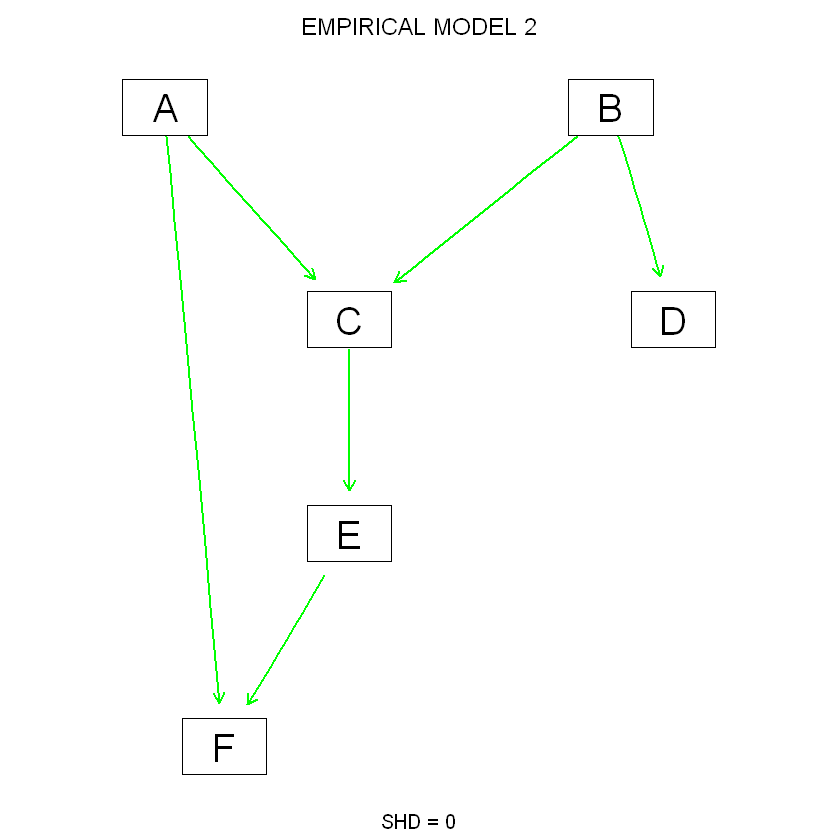

In [5]:
computeShd <- function(theor, empirList, plot=FALSE) {
  DAG1 <- amat(theor)
  
  shd_values <- sapply(empirList, function(empir) shd(DAG1, amat(empir)))
  
  if (plot) {
    plot_list <- c(list(theor), empirList)
    
    num_empirical <- length(empirList)
    
    titles <- c("THEORETICAL MODEL", paste("EMPIRICAL MODEL", seq_len(num_empirical)))
    subtitles <- c(paste("SHD =", "0"), paste("SHD =", shd_values))
    
    do.call(graphviz.compare, c(list(plot_list[[1]]), plot_list[-1], 
                                list(shape = "rectangle", 
                                     main = titles, 
                                     sub = subtitles,
                                     diff.args = list(tp.lwd = 2, tp.col = "green", fn.col = "orange"))))
  }
  
  return(shd_values)
}

e1 <- model2network("[A][B][C|A:B][D|B][E|C][F|A:E]")
empirList <- list(
  model2network("[A][B][C|A:B][D|B][E|C:F][F|A]"),
  model2network("[A][B][C|A:B][D|B][E|C][F|A:E]")
)

shd_results <- computeShd(e1, empirList, plot=TRUE)
print(shd_results)


# RUIZ DATA SET

In [6]:
records <- c(1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0)
ruiz_example  <- data.frame(matrix(records, 10,3, byrow=TRUE))

ruiz_example

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1


bnstruct :: structure learning algorithm not recognized, using MMHC

bnstruct :: (available options are: SM, MMHC, MMPC, HC, SEM)

bnstruct :: MMHC uses 'max.fanin', but apparently you set 'max.parents', changing accordingly.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



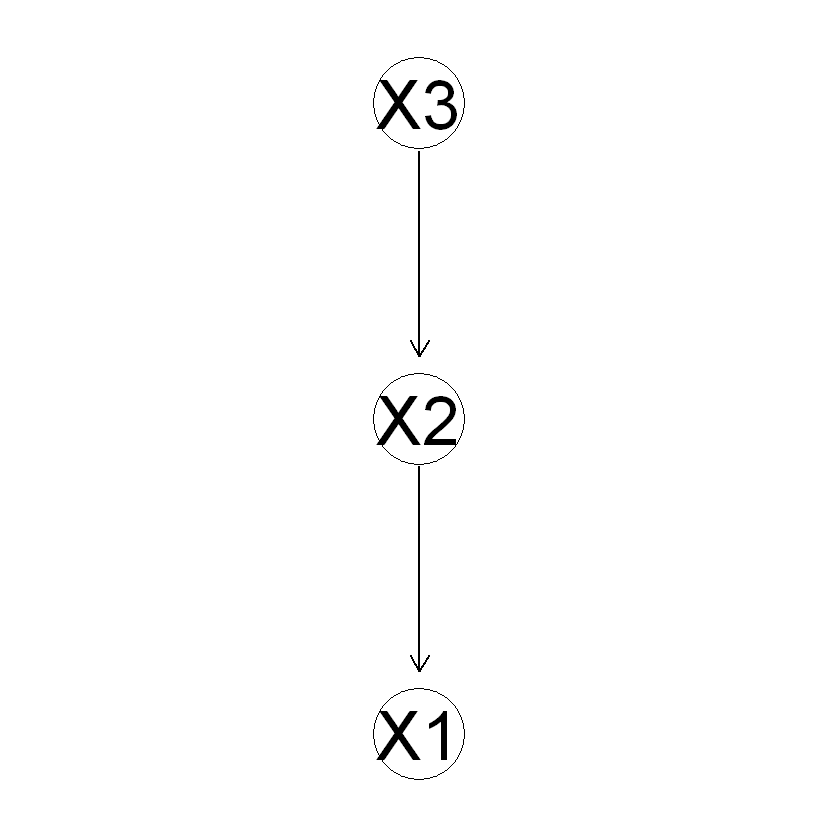

In [7]:
dagRuiz <- learning(data = ruiz_example,  maxParent=5, algo = "k2", percentage = 1, plot = T)

In [8]:
dagRuiz$dag
dagRuiz$score


  Random/Generated Bayesian network

  model:
   [X3][X2|X3][X1|X2] 
  nodes:                                 3 
  arcs:                                  2 
    undirected arcs:                     0 
    directed arcs:                       2 
  average markov blanket size:           1.33 
  average neighbourhood size:            1.33 
  average branching factor:              0.67 

  generation algorithm:                  Empty 


[1] -20.19397

# ASIA DATA SET

In [9]:
asia_df <- asia() |> # S4 object
  impute() |> # Impute the dataset to remove missing values
  imputed.data() |> # Extract the imputed dataset
  as.data.frame() # Convert to a data frame

# Set the column names
colnames(asia_df) <- asia()@variables
print(colnames(asia_df))

head(asia_df)

bnstruct :: performing imputation ...



bnstruct :: imputation finished.



[1] "Asia"         "Tubercolosys" "Smoke"        "LungCancer"   "Bronchitis"  
[6] "Either"       "X-ray"        "Dyspnea"     


,Asia,Tubercolosys,Smoke,LungCancer,Bronchitis,Either,X-ray,Dyspnea
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,1,1,1,2,1,2
2,2,1,1,1,1,1,2,1
3,1,1,2,1,1,1,2,1
4,2,1,2,1,1,1,2,1
5,2,1,2,1,1,1,1,2
6,2,1,2,1,1,1,2,2


bnstruct :: structure learning algorithm not recognized, using MMHC

bnstruct :: (available options are: SM, MMHC, MMPC, HC, SEM)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



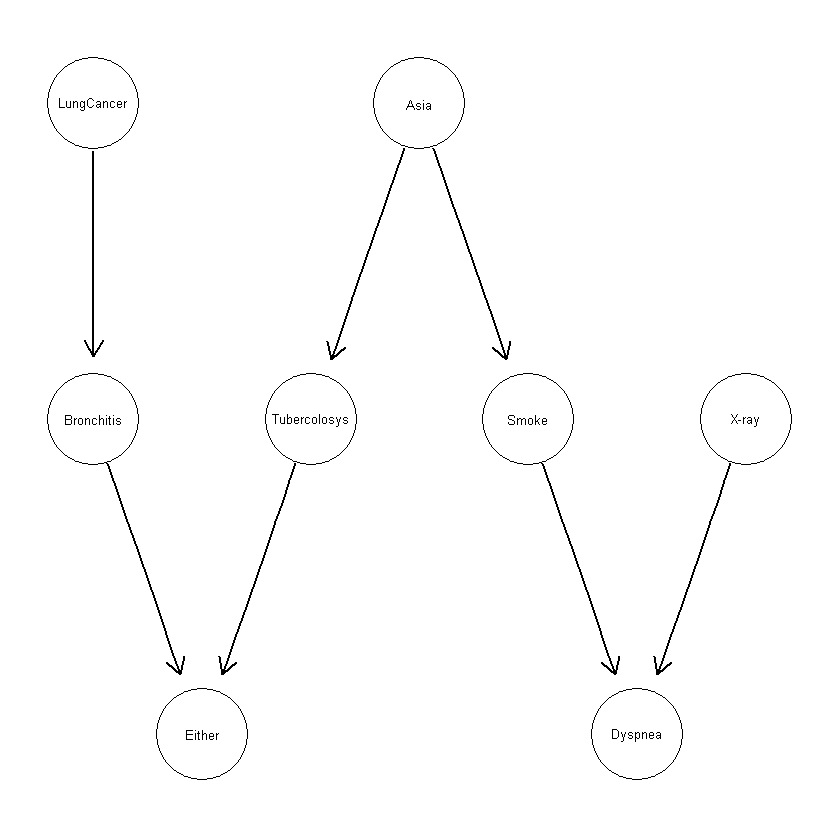

In [10]:
dagAsia <- learning(asia_df, maxParent=5, algo = "k2", percentage = 1, plot = T)

In [11]:
dagAsia$dag
dagAsia$score


  Random/Generated Bayesian network

  model:
   [Asia][LungCancer][X-ray][Tubercolosys|Asia][Smoke|Asia]
   [Bronchitis|LungCancer][Either|Tubercolosys:Bronchitis][Dyspnea|Smoke:X-ray]
  nodes:                                 8 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           2.25 
  average neighbourhood size:            1.75 
  average branching factor:              0.88 

  generation algorithm:                  Empty 


[1] -24214.78

In [44]:
algorithms <- c("hc", "sm", "mmpc", "mmhc", "sem")
dag_listAsia <- list()
score_listAsia <- list()

for (algo in algorithms) {
  dagAsia <- learning(asia_df, maxParent=5, algo = algo, percentage = 1, plot = F)
  dag_listAsia[[algo]] <- dagAsia$dag
  score_listAsia[[algo]] <- dagAsia$score
}

bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: MMPC uses 'max.fanin', but apparently you set 'max.parents', changing accordingly.

bnstruct :: learning the structure using MMPC ...

bnstruct :: learning using MMPC completed.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SEM ...

... bnstruct :: no missing values found, learning the network once

... bnstruct 

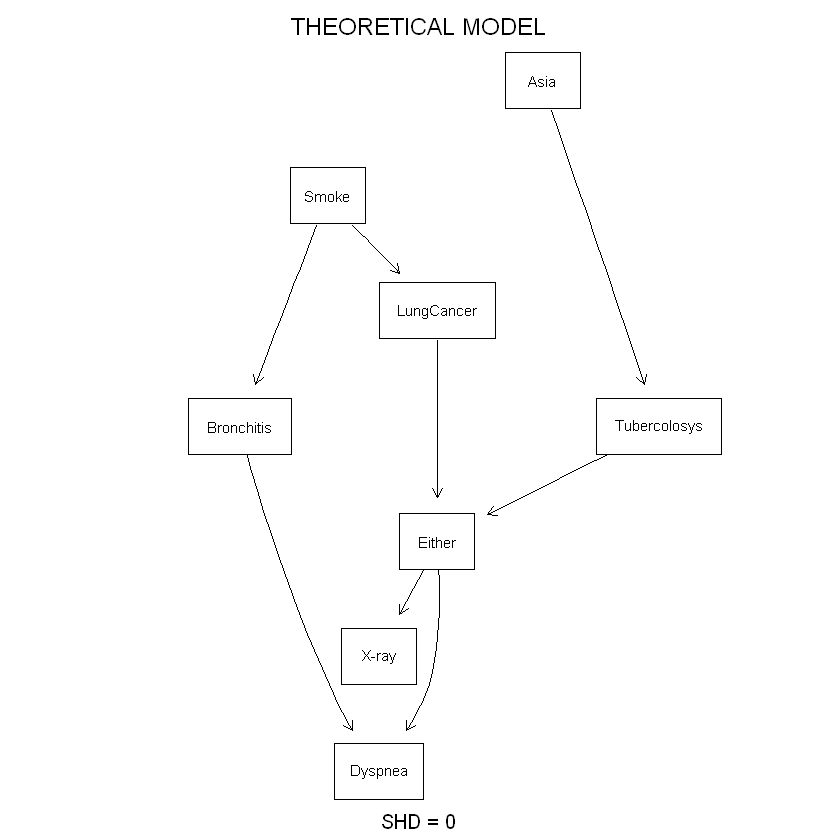

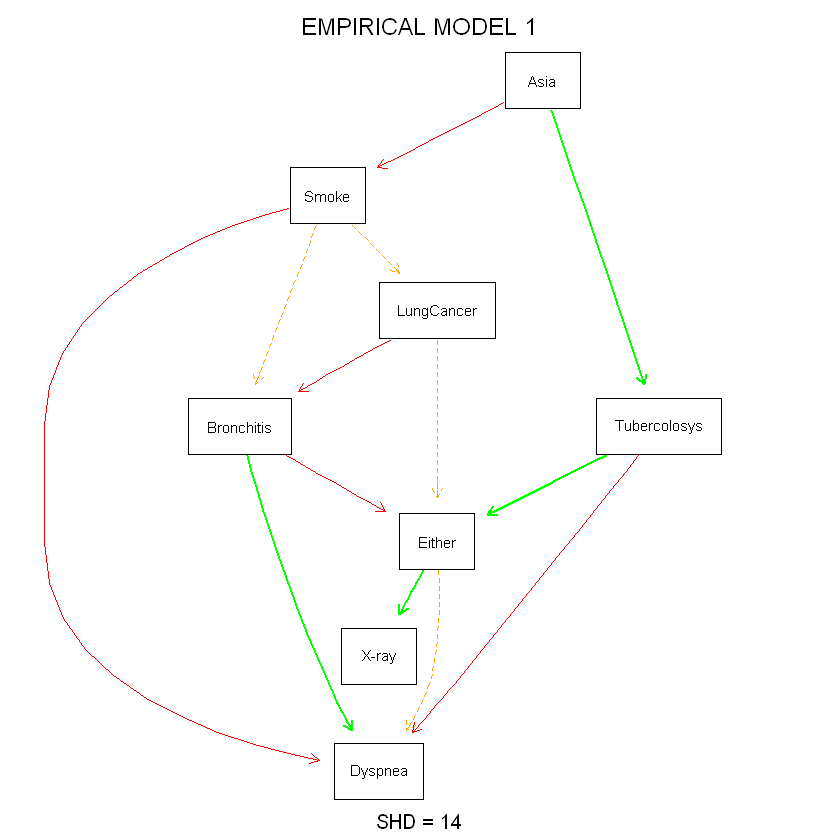

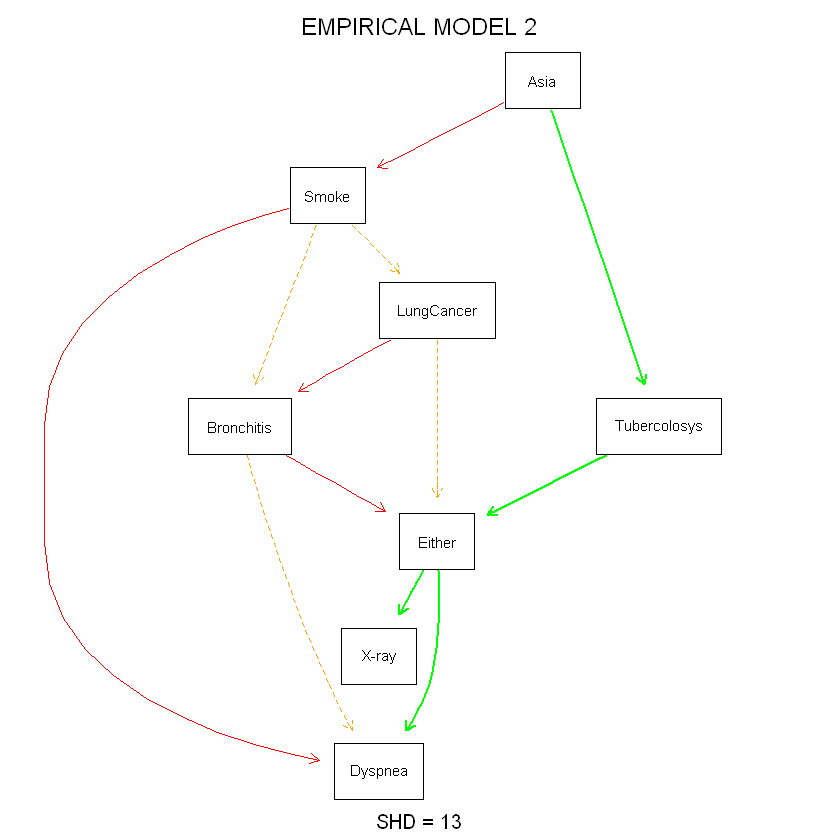

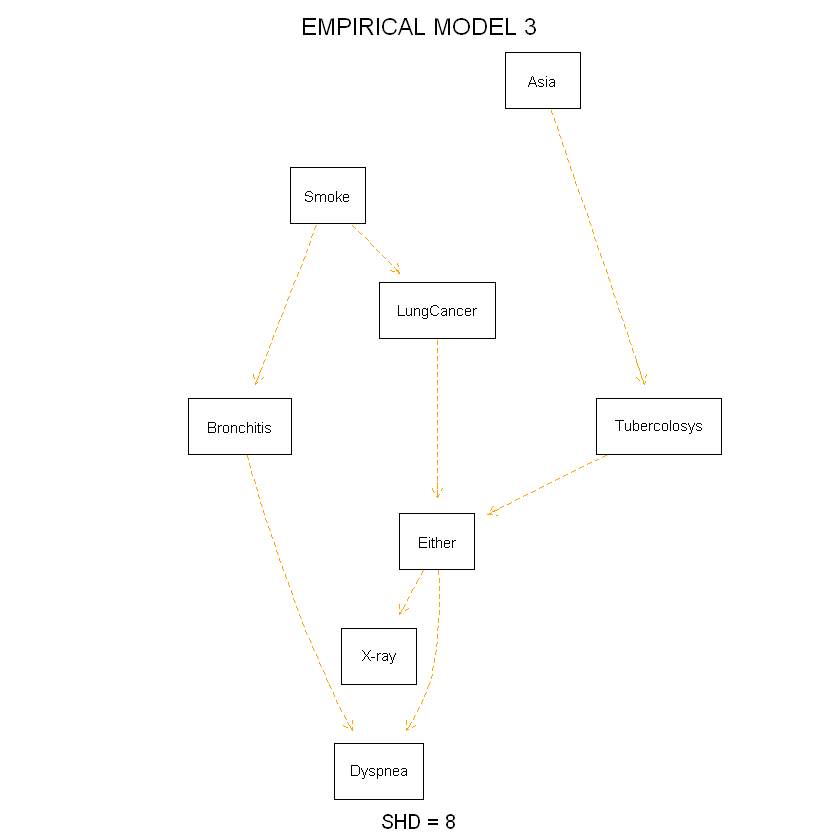

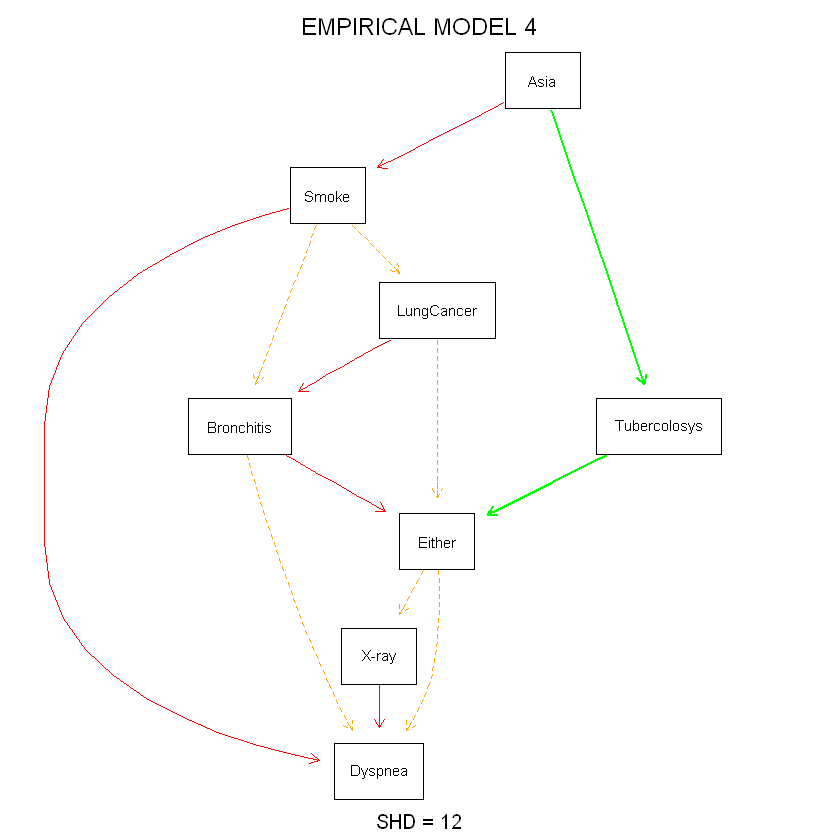

hc   sm mmpc mmhc  sem 
  14   13    8   12   12

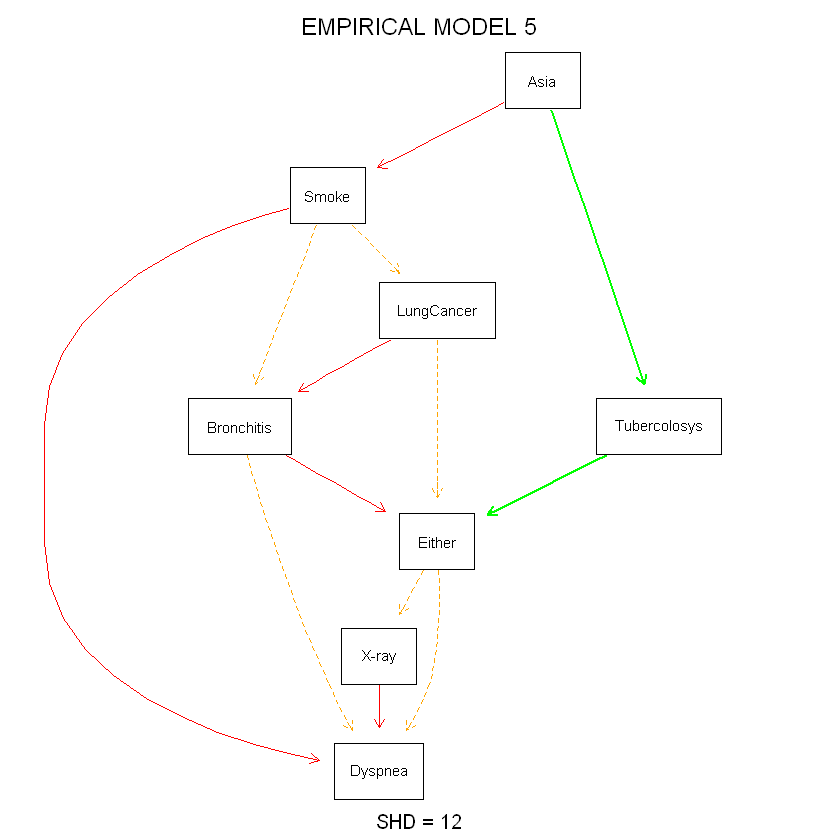

In [45]:
theorDAG <- model2network("[Asia][Tubercolosys|Asia][Smoke][LungCancer|Smoke][Either|Tubercolosys:LungCancer][X-ray|Either][Dyspnea|Either:Bronchitis][Bronchitis|Smoke]")
listAsia <- dag_listAsia
computeShd(theorDAG, dag_listAsia, plot=T)

bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: HC uses 'max.fan

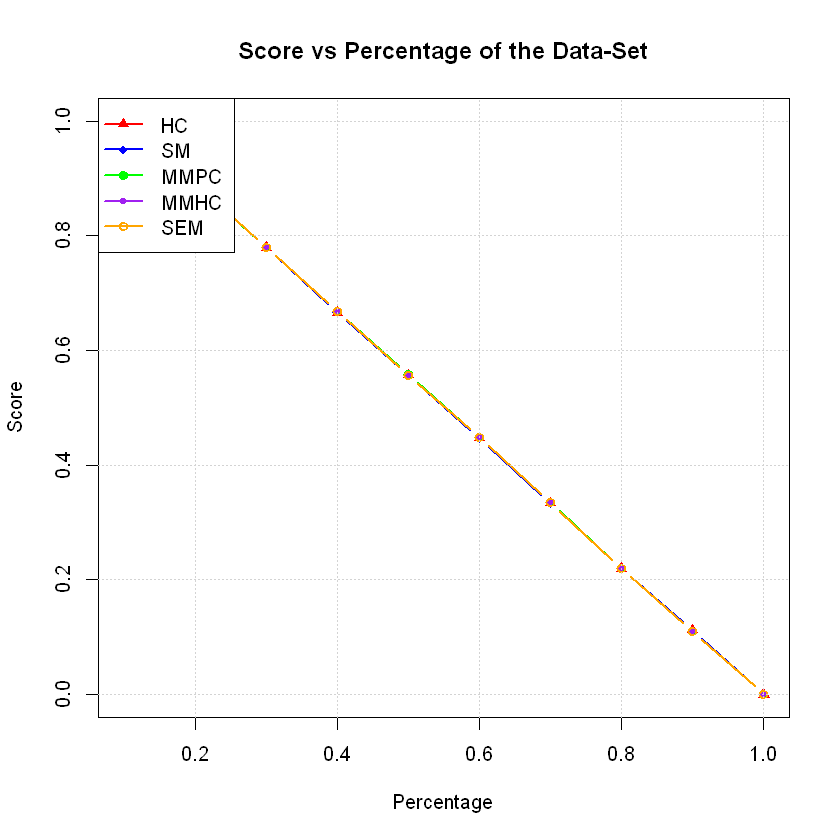

In [37]:
percentages <- seq(0.1, 1, by = 0.1)

compute_scores_and_dags <- function(algo, data, percentages) {
  results <- lapply(percentages, function(p) learning(data = data, algo = algo, maxParent = 3, percentage = p))
  scores <- sapply(results, function(res) res$score)
  dags <- lapply(results, function(res) res$dag)
  min_score <- min(scores)
  max_score <- max(scores)
  scores_normalized <- (scores - min_score) / (max_score - min_score)
  return(list(scores = scores_normalized, dags = dags))
}

algorithms <- c("hc", "sm", "mmpc", "mmhc", "sem")
results <- lapply(algorithms, function(algo) compute_scores_and_dags(algo, asia_df, percentages))

scores_list <- lapply(results, function(res) res$scores)
dags_list <- lapply(results, function(res) res$dags)
names(scores_list) <- algorithms
names(dags_list) <- algorithms

colors <- c("red", "blue", "green", "purple", "orange")
pch_values <- 17:21

plot(x, scores_list[[1]], type = "b", pch = pch_values[1], col = colors[1], lwd = 2,
     main = "Score vs Percentage of the Data-Set", xlab = "Percentage", ylab = "Score")

for (i in 2:length(algorithms)) {
  lines(x, scores_list[[i]], type = "b", pch = pch_values[i], col = colors[i], lwd = 2)
}

grid(col = "lightgray", lty = "dotted")
legend("topleft", legend = toupper(algorithms),
       col = colors, pch = pch_values, lty = 1, lwd = 2)

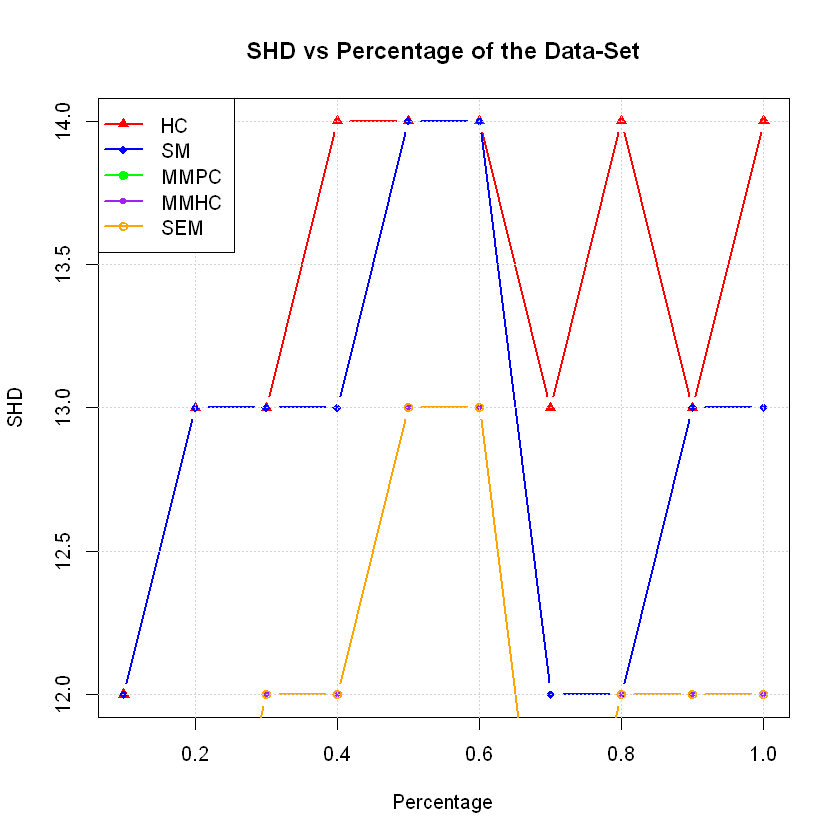

In [39]:
percentages <- seq(0.1, 1, by = 0.1)

shd_values <- list()

for (i in 1:length(dags_list)) {
  shd_values[[i]] <- sapply(dags_list[[i]], function(dag) computeShdSingle(theor = theorDAG, empir = dag)[1])
}

colors <- c("red", "blue", "green", "purple", "orange")
pch_values <- 17:21

plot(percentages, shd_values[[1]], type = "b", pch = pch_values[1], col = colors[1], lwd = 2,
     main = "SHD vs Percentage of the Data-Set", xlab = "Percentage", ylab = "SHD")

for (i in 2:length(shd_values)) {
  lines(percentages, shd_values[[i]], type = "b", pch = pch_values[i], col = colors[i], lwd = 2)
}

grid(col = "lightgray", lty = "dotted")
legend("topleft", legend = toupper(algorithms),
       col = colors, pch = pch_values, lty = 1, lwd = 2)

In [20]:
dim(asia_df)

[1] 10000     8

# CHILD DATA SET

In [17]:
# Load the data
child_df <- child() |> # S4 object
  impute() |> # Impute the dataset to remove missing values
  imputed.data() |> # Extract the imputed dataset
  as.data.frame() # Convert to a data frame

# Set the column names
colnames(child_df) <- child()@variables
print(colnames(child_df))

head(child_df)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



 [1] "BirthAsphyxia"  "Disease"        "Age"            "LVH"           
 [5] "DuctFlow"       "CardiacMixing"  "LungParench"    "LungFlow"      
 [9] "Sick"           "HypDistrib"     "HypoxiaInO2"    "CO2"           
[13] "ChestXray"      "Grunting"       "LVHReport"      "LowerBodyO2"   
[17] "RUQO2"          "CO2Report"      "XrayReport"     "GruntingReport"


,BirthAsphyxia,Disease,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHReport,LowerBodyO2,RUQO2,CO2Report,XrayReport,GruntingReport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,3,2,1,3,1,1,2,1,1,1,1,2,2,2,3,2,1,2
2,2,4,2,1,1,2,1,2,2,1,2,1,2,2,1,2,2,1,2,2
3,2,3,1,2,1,3,1,2,2,1,2,2,2,2,2,1,2,1,2,2
4,2,4,1,1,1,3,1,1,2,1,3,1,1,2,1,3,1,1,1,2
5,2,2,1,2,2,4,1,1,1,1,3,1,1,2,2,1,1,1,2,2
6,2,2,1,2,1,4,1,3,2,1,3,1,3,2,2,2,1,1,3,2


bnstruct :: structure learning algorithm not recognized, using MMHC

bnstruct :: (available options are: SM, MMHC, MMPC, HC, SEM)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



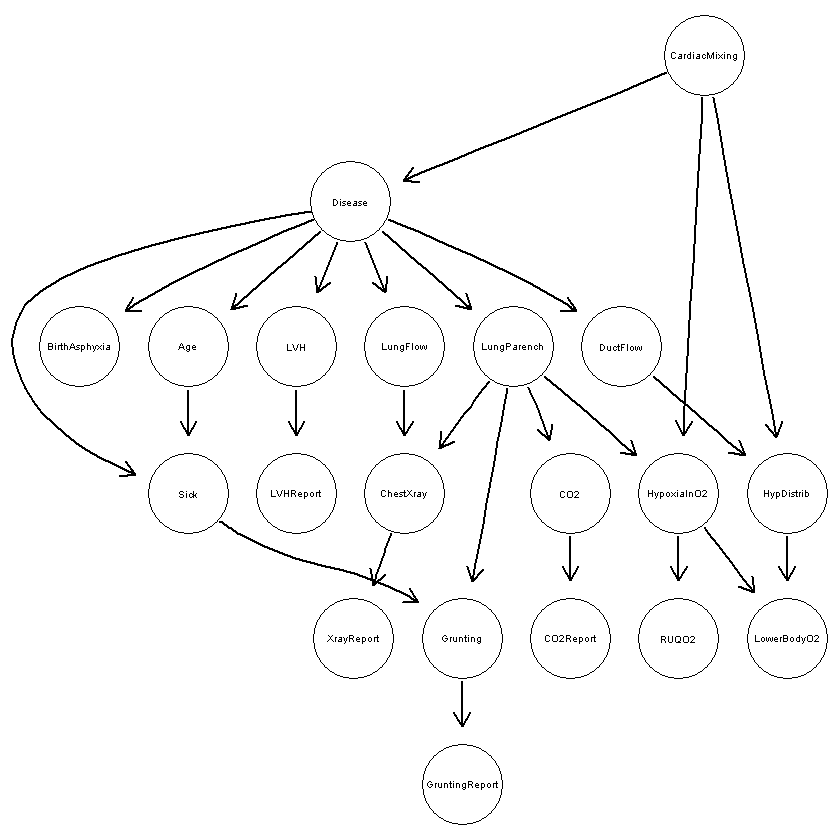

In [18]:
dagChild <- learning(child_df, maxParent=5, algo = "k2", percentage = 1, plot = T)

In [19]:
dagChild$dag
dagChild$score


  Random/Generated Bayesian network

  model:
   [CardiacMixing][Disease|CardiacMixing][BirthAsphyxia|Disease][Age|Disease]
   [LVH|Disease][DuctFlow|Disease][LungParench|Disease][LungFlow|Disease]
   [Sick|Disease:Age][HypDistrib|DuctFlow:CardiacMixing]
   [HypoxiaInO2|CardiacMixing:LungParench][CO2|LungParench]
   [ChestXray|LungParench:LungFlow][LVHReport|LVH][Grunting|LungParench:Sick]
   [LowerBodyO2|HypDistrib:HypoxiaInO2][RUQO2|HypoxiaInO2][CO2Report|CO2]
   [XrayReport|ChestXray][GruntingReport|Grunting]
  nodes:                                 20 
  arcs:                                  25 
    undirected arcs:                     0 
    directed arcs:                       25 
  average markov blanket size:           3.00 
  average neighbourhood size:            2.50 
  average branching factor:              1.25 

  generation algorithm:                  Empty 


[1] -59936.5